In [238]:
import random

class Neuron:

    def __init__(self, nin):
        self.weights = tensor([random.uniform(-1.0,1.0) for _ in range(nin)], requires_grad=True)
        self.bias = tensor(random.uniform(-1.0,1.0), requires_grad=True)

    def __call__(self, x):
        act = x @ self.weights + self.bias
        nl = tanh(act)
        return nl

    def parameters(self):
        return [ self.weights, self.bias ]

class Layer:

    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]

    def __call__(self, x):
        out = [n(x) for n in self.neurons]
        tout = torch.stack(out, dim=1)
        return tout

    def parameters(self):
        params = []
        for n in self.neurons:
            params.extend(n.parameters())
        return params


class MLP:

    def __init__(self, nin, layout):
        lays = [nin] + layout
        self.layers = [ Layer(lays[i], lays[i+1]) for i in range(len(layout))]

    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        params = []
        for l in self.layers:
            params.extend(l.parameters())
        return params

def mean_square_root(y, y_expected):
    return ((y - y_expected)**2).mean()


tensor([[-0.3669,  1.0000],
        [ 0.8929,  1.0000],
        [-0.5448,  1.0000],
        [ 0.2124,  1.0000],
        [ 0.0630,  1.0000]])


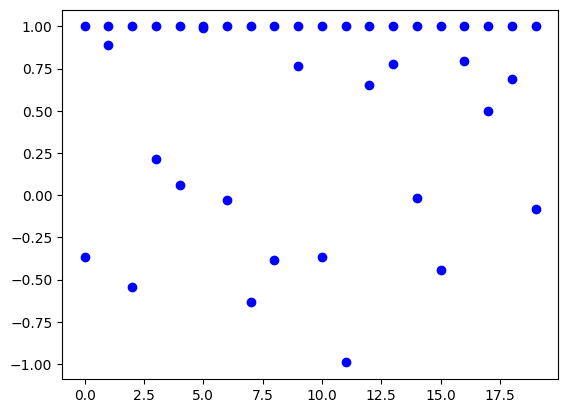

In [38]:
import torch
from torch import tensor, tanh, sum
from matplotlib import pyplot as plt

import matplotlib
import torchviz

n = 20
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1.0) #replace ones by uniformly generated numbers between -1 and 1 inplace.
print(x[:5])


coef = torch.tensor([-1.0,1.5]);
errors = torch.empty(n).normal_(mean=0,std=0.25)
y = x@coef + errors
plt.plot( x , 'bo')



In [39]:
n = 100
x = torch.ones(n,2)
x[:,0].uniform_(-1.,1) #replace ones by uniformly generated numbers between -1 and 1 inplace.
x[:5]

tensor([[ 0.7998,  1.0000],
        [-0.1997,  1.0000],
        [ 0.0789,  1.0000],
        [-0.9193,  1.0000],
        [-0.2746,  1.0000]])

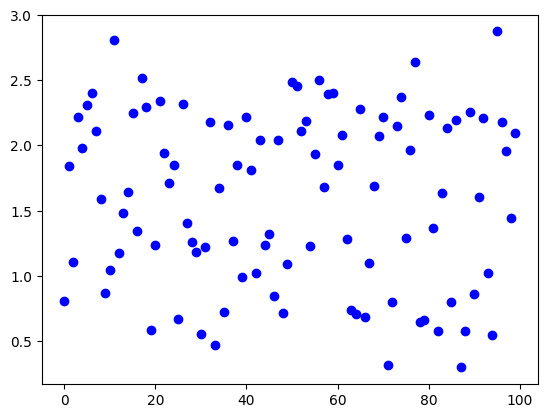

In [41]:
coef = torch.tensor([-1.,1.5]);
errors = torch.empty(n).normal_(mean=0,std=0.25)
y = x@coef + errors
y[:5]

plt.plot( y , 'bo')


In [42]:
coef_hat = torch.tensor([2.,1], requires_grad= True) #estimates of a and b || tell pytorch we need the gradients.

y_hat = x@coef_hat


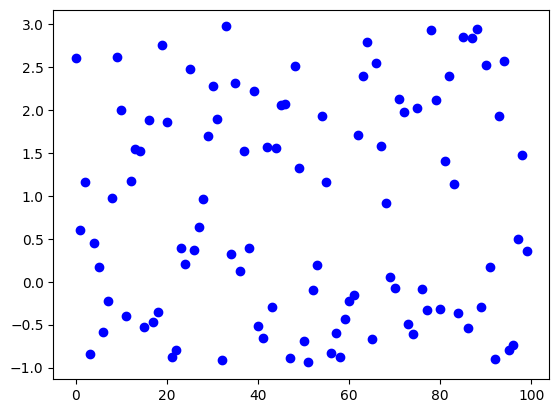

In [45]:
y_hat
plt.plot( y_hat.detach().numpy() , 'bo')


In [240]:
mlp = MLP(1, [1])
stats = []

(trainx.shape, outputs.shape, input.shape, mlp.parameters())

(torch.Size([110]),
 torch.Size([110]),
 torch.Size([110, 1]),
 [tensor([0.4504], requires_grad=True), tensor(0.0390, requires_grad=True)])

[tensor([-4.3199e-06], requires_grad=True), tensor(1.1270, requires_grad=True)]


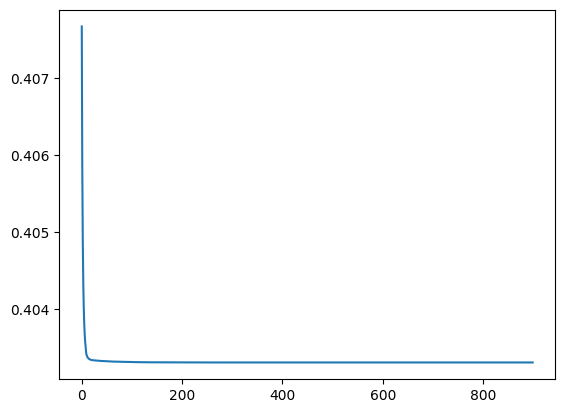

In [241]:

for i in range(1000):
    nonlinear = mlp(input)
    loss = mean_square_root(nonlinear, outputs)
    if i % 10:
        stats.append(loss.data)

    loss.backward()
    lr = 0.5

    with torch.no_grad():
        for p in mlp.parameters():
            p.data = p.data - (lr * p.grad.data)

    for p in mlp.parameters():
        p.grad = None


plt.plot(stats)
print(mlp.parameters())

In [242]:
mlp.parameters()

[tensor([-4.3199e-06], requires_grad=True), tensor(1.1270, requires_grad=True)]

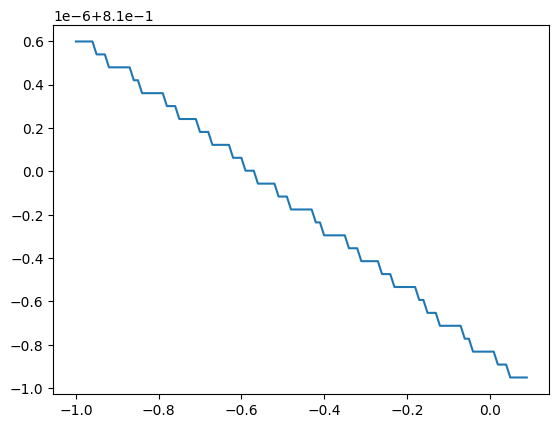

In [243]:
with torch.no_grad():
    result = mlp(input)
    plt.plot(input, result)